# Test python for ASK Modulation and De_MOdulation

# Prof_Hisham Abdel Hakam
# Eng_Omar Ahmed Shwaqy

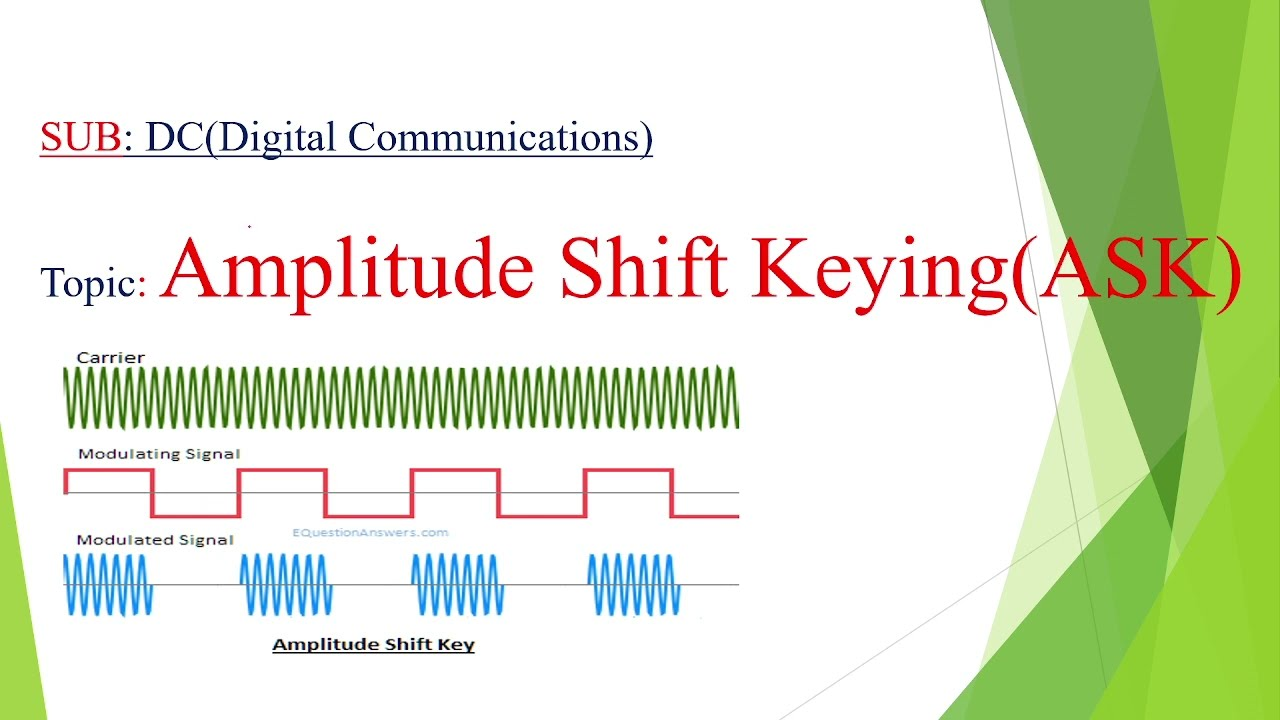

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

Binary information at transmitter:
[0 1 0 0 1 1 0 1]


Text(0.5, 1.0, 'Transmitting information as digital signal')

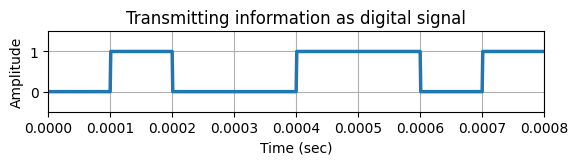

In [2]:
# Python code for binary ASK modulation and demodulation
bp = 0.0001  # Bit period
bit = np.array([0, 1, 0, 0, 1, 1, 0, 1])  # Binary information to transmit
print('Binary information at transmitter:')
print(bit)

# Representation of transmitting binary information as digital signal
bit_rate = 1 / bp
n = 100  # Number of samples per bit
digit = []  # Digital signal initialization

for i in range(len(bit)):
    if bit[i] == 1:
        se = np.ones(n)  # Set high for bit 1
    else:
        se = np.zeros(n)  # Set low for bit 0
    digit.extend(se)

# t1 = np.arange(bp / 100, 100 * len(bit) * (bp / 100), bp / 100)
t1 = np.linspace(bp / 100, bp * len(bit), len(digit)) # Use np.linspace to ensure correct length
plt.subplot(4, 1, 1)
plt.plot(t1, digit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp * len(bit), -0.5, 1.5])
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.title('Transmitting information as digital signal')




Text(0.5, 1.0, 'Binary ASK Modulated Signal')

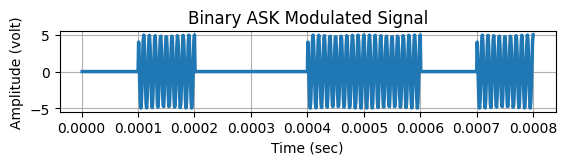

In [3]:
# Binary ASK Modulation
A1 = 5  # Amplitude of carrier signal for bit 1
A2 = 0  # Amplitude of carrier signal for bit 0
f = bit_rate * 10  # Carrier frequency

t2 = np.arange(bp / 99, bp, bp / 99)
x = []  # Modulated signal initialization

for i in range(len(bit)):
    if bit[i] == 1:
        y = A1 * np.cos(2 * np.pi * f * t2)  # Carrier for bit 1
    else:
        y = A2 * np.cos(2 * np.pi * f * t2)  # Carrier for bit 0
    x.extend(y)

t3 = np.arange(bp / 99, bp * len(bit), bp / 99)
plt.subplot(4, 1, 2)
plt.plot(t3, x, linewidth=2.5)
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (volt)')
plt.title('Binary ASK Modulated Signal')




Demodulated binary information at receiver:
[0, 1, 0, 0, 1, 1, 0, 1]


Text(0.5, 1.0, 'Demodulated Signal')

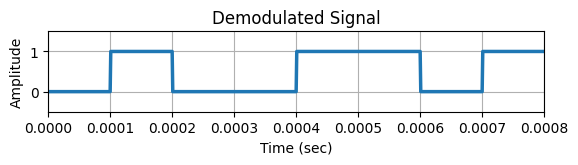

In [4]:
# Binary ASK Demodulation
demodulated_bit = []  # Demodulated binary sequence
for i in range(len(bit)):
    # Extract each bit duration segment from the modulated signal
    segment = x[i * len(t2):(i + 1) * len(t2)]

    # Calculate the mean amplitude of the segment
    mean_amplitude = np.mean(np.abs(segment))

    # Decision threshold: if mean amplitude is closer to A1, it's bit 1; else bit 0
    if mean_amplitude > A1 / 2:
        demodulated_bit.append(1)
    else:
        demodulated_bit.append(0)

# Plotting demodulated signal
print('Demodulated binary information at receiver:')
print(demodulated_bit)

# Digital representation of demodulated data
demodulated_signal = []
for i in range(len(demodulated_bit)):
    if demodulated_bit[i] == 1:
        se = np.ones(n)  # High for bit 1
    else:
        se = np.zeros(n)  # Low for bit 0
    demodulated_signal.extend(se)

plt.subplot(4, 1, 3)
plt.plot(t1, demodulated_signal, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp * len(bit), -0.5, 1.5])
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.title('Demodulated Signal')

# Thanks